In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from gaf.gaf import GAF
from ts2vg import NaturalVG, HorizontalVG
from utils.draw import draw_side_by_side

In [11]:
xs = np.array(list(range(1, 6)) * 3)

In [16]:

g = GAF(xs)
gasf = g.gasf()
gadf = g.gadf()

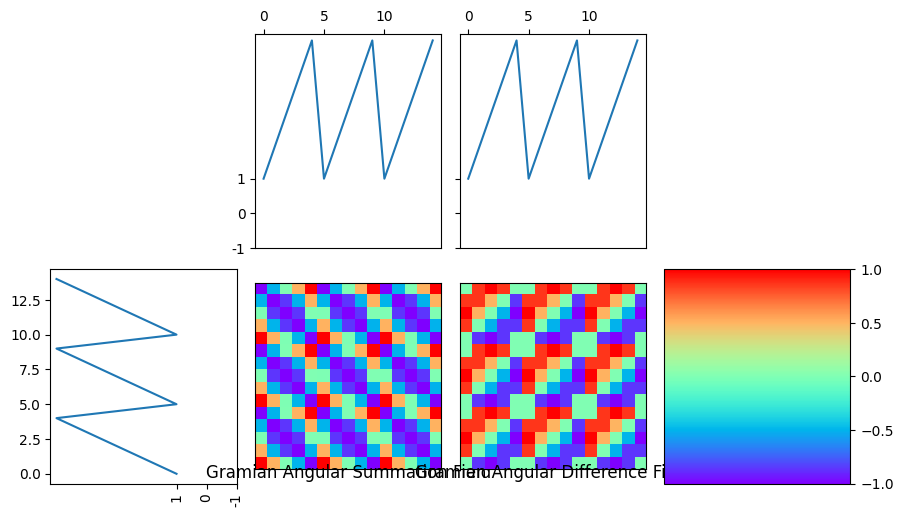

In [17]:
ts = list(range(len(xs)))
draw_side_by_side(xs, ts, gasf, gadf)

In [21]:
vg = HorizontalVG()
vg.build(xs)

In [30]:
gx = vg.as_networkx()

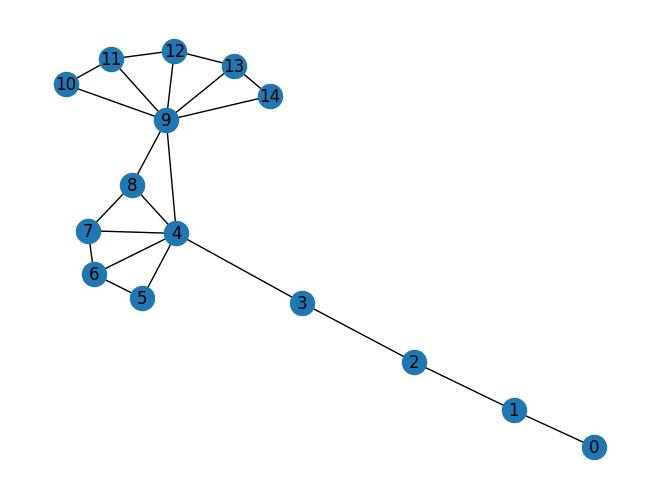

In [31]:
nx.draw(gx, with_labels=True)

In [44]:
degrees = list(nx.degree(gx))
[(d, l) for (d, l) in degrees if d == max(degrees[:, 1])]


TypeError: list indices must be integers or slices, not tuple